In [1]:
!pip install lifelines

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [3]:
#loading the survival un-employment data
survival_unemp=pd.read_csv("/survival_unemployment.csv")
survival_unemp.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [4]:
survival_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [5]:
survival_unemp.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [6]:
survival_unemp[["spell"]].describe()

,spell
count,3343.000000
mean,6.247981
std,5.611271
min,1.000000
25%,2.000000
50%,5.000000
75%,9.000000
max,28.000000


In [7]:
#spell is reffering to time
T=survival_unemp.spell

In [8]:
#initiating the KaplanMeierFitter model
kmf=KaplanMeierFitter()

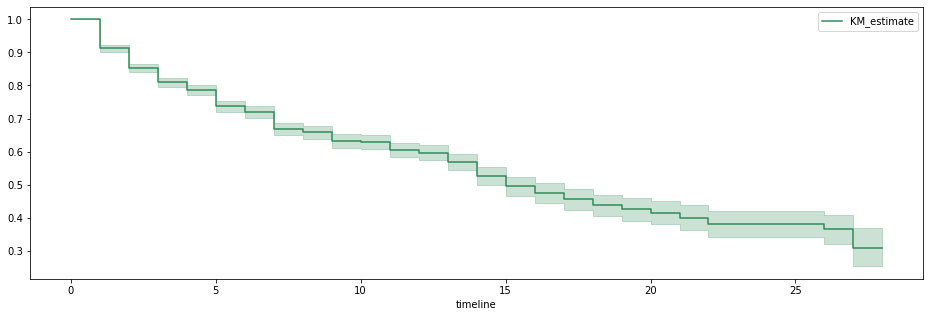

In [9]:
#fitting KaplanMeierFitter model on Time and Events for death
plt.figure(figsize=(16,5))
kmf.fit(T,event_observed=survival_unemp.event)
#timeline estimations plot
kmf.plot(color="seagreen");

In [10]:
#over multiple groups
#for each group,here group is ui
pd.DataFrame(survival_unemp.ui.value_counts())

,ui
1,1848
0,1495


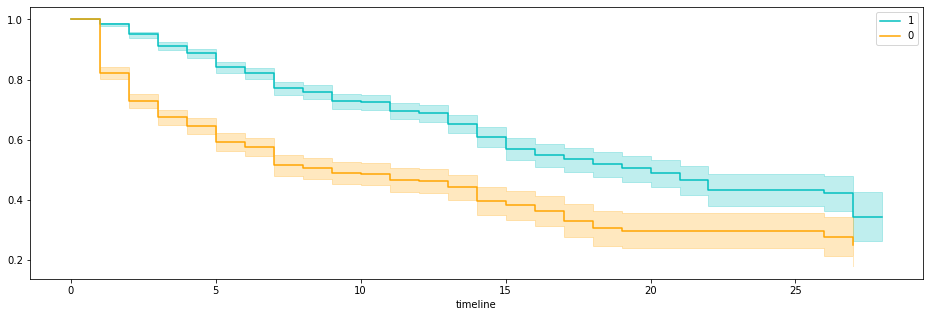

In [11]:
#applying KaplanMierFitter model on Time and Events for the group "1"
plt.figure(figsize=(16,5))
kmf.fit(T[survival_unemp.ui==1],survival_unemp.event[survival_unemp.ui==1],label="1")
ax= kmf.plot(color="c")

#applying KaplanMierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==0],survival_unemp.event[survival_unemp.ui==0],label="0")
kmf.plot(ax=ax,color="orange");